In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import silhouette_score

In [7]:
data = pd.read_csv("data/CleanGithubRepo.csv")
data.shape

(183956, 18)

In [8]:
data.head()

,HasIssues,HasProjects,HasDownloads,HasWiki,HasPages,HasDiscussions,IsArchived,IsTemplate,IsPopular,"created_(2006.984, 2012.333]","created_(2012.333, 2017.667]","created_(2017.667, 2023.0]","updated_(2018.996, 2020.333]","updated_(2020.333, 2021.667]","updated_(2021.667, 2023.0]",IPCA1,IPCA2,IPCA3
0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,1,4.461577,1.298450,-0.086356
1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,4.383835,0.927213,-0.244027
2,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,4.040522,-0.712199,-0.940311
3,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,4.461577,1.298450,-0.086356
4,1,1,1,1,1,0,0,0,1,0,1,0,0,0,1,4.137982,-0.246803,-0.742650


In [7]:
dw = data.copy()

In [1]:
df = dw.sample(3000,random_state=191)
df.shape

NameError: name 'dw' is not defined

# <center> Clustering</center>

## K-MEANS

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
sd = StandardScaler().fit_transform(data)

In [16]:
inertia,sil= [],[]
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(sd)
    inertia.append(km.inertia_)
    # sil.append(silhouette_score(sd,km.labels_))

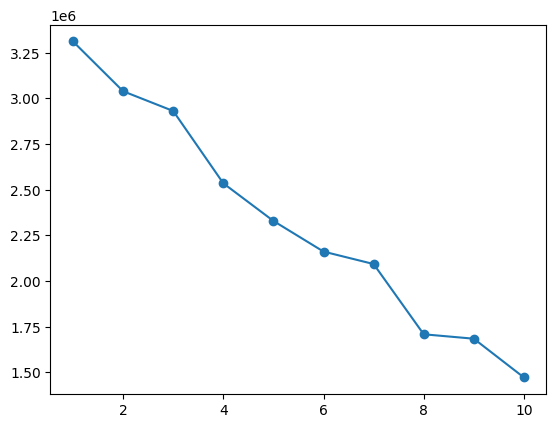

In [17]:
plt.plot(range(1,11),inertia, marker = 'o')

ValueError: x and y must be the same size

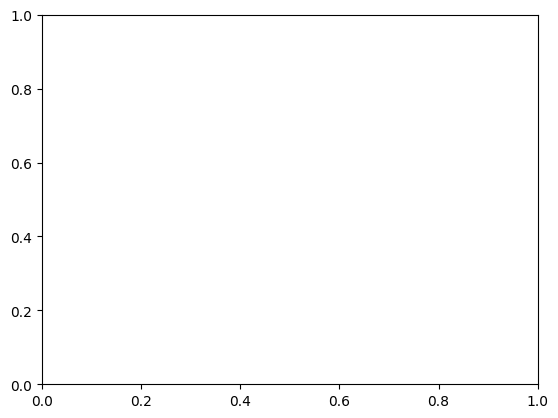

In [19]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

# plt.scatter(df)

## DBSCAN

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [45]:
scaled_df = StandardScaler().fit_transform(df)


In [23]:
best_eps, best_min_samples, best_silhouette = 0, 0, -1
sil = []
for eps in np.arange(0.5,1,step=0.5):
    for min_samples in np.arange(10,15,step=5):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(sd)
        silhouette = silhouette_score(sd, labels)
        sil.append(silhouette)
        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_eps = eps
            best_min_samples = min_samples

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_silhouette}")

KeyboardInterrupt: 

In [25]:
dbscan = DBSCAN(eps=4, min_samples=5)
df['dbscan'] = dbscan.fit_predict(sd)
df['dbscan'].nunique()

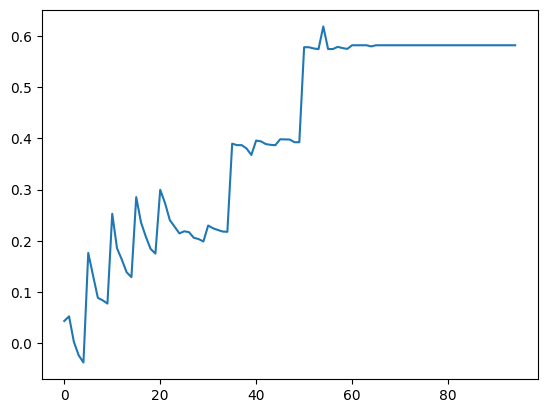

In [70]:
plt.plot(sil)

In [77]:
plt.scatter(df['IPCA1'], scaled_df['IsPopular'], c=df['dbscan'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Hierarchial

In [8]:
%matplotlib inline

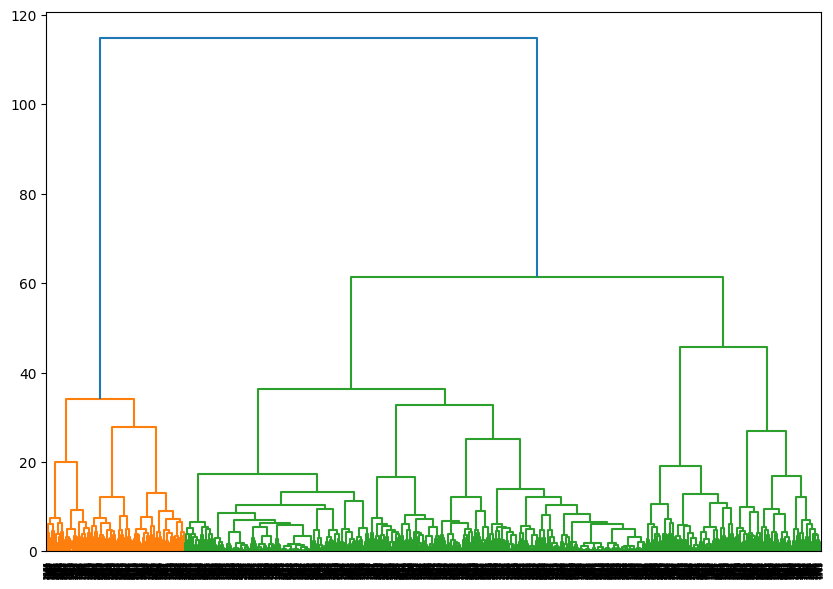

In [12]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(df,method='ward'))